(insert introduction and all that)

In [26]:
library(tidyverse)

In [27]:
star_data <- read_csv("HTRU_2.csv", col_names=FALSE, show_col_types = FALSE) |>
    mutate(X9 = as_factor(X9))

colnames(star_data) <- c("integrated_profile_mean", "integrated_profile_std_dev", 
                         "integrated_profile_excess_kurtosis","integrated_profile_skewness",
                         "dm_snr_curve_mean","dm_snr_curve_st_dev",
                         "dm_snr_curve_excess_kurtosis","dm_snr_curve_skewness",
                         "is_pulsar_star")

sample_n(star_data, 5)

integrated_profile_mean,integrated_profile_std_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
115.25781,51.89205,0.42354588,0.1692655,16.980769,54.41182,2.92702,6.70600,0
112.47656,42.84601,0.19327656,0.5377330,3.187291,21.66023,7.67244,63.86477,0
82.67969,37.76675,0.69940198,2.3057086,1.464047,12.79787,12.43685,185.31126,0
119.97656,48.87747,-0.07933717,-0.3060041,2.060201,17.87446,10.04384,106.98689,0
119.96094,47.58289,0.31147118,-0.1783516,1.012542,12.61571,14.34482,228.44217,0


In [28]:
star_num_table <- star_data |>
    group_by(is_pulsar_star) |>
    summarize(num_stars = n())
star_num_table

is_pulsar_star,num_stars
<fct>,<int>
0,16259
1,1639


In [29]:
star_means_table <- star_data |>
    group_by(is_pulsar_star)|>
    summarize(across(integrated_profile_mean:dm_snr_curve_skewness, mean))
star_means_table

is_pulsar_star,integrated_profile_mean,integrated_profile_std_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.56273,47.33974,0.2104401,0.380844,8.863258,23.28798,8.862674,113.62034
1,56.69061,38.71060,3.1306554,15.553576,49.825995,56.46896,2.757069,17.93173


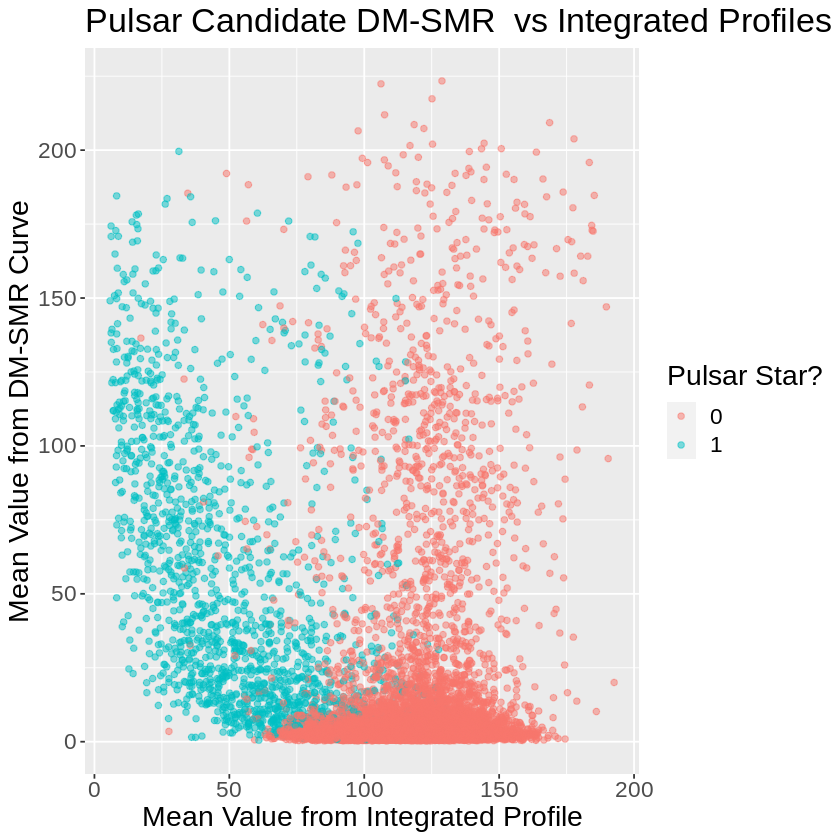

In [37]:
ggplot(star_data, aes(x = integrated_profile_mean, y = dm_snr_curve_mean, color = is_pulsar_star)) +
    geom_point(alpha=0.5) +
    labs(x = "Mean Value from Integrated Profile",
         y = "Mean Value from DM-SMR Curve",
         color = "Pulsar Star?") +
    ggtitle("Pulsar Candidate DM-SMR  vs Integrated Profiles") +
    theme(text = element_text(size = 17))

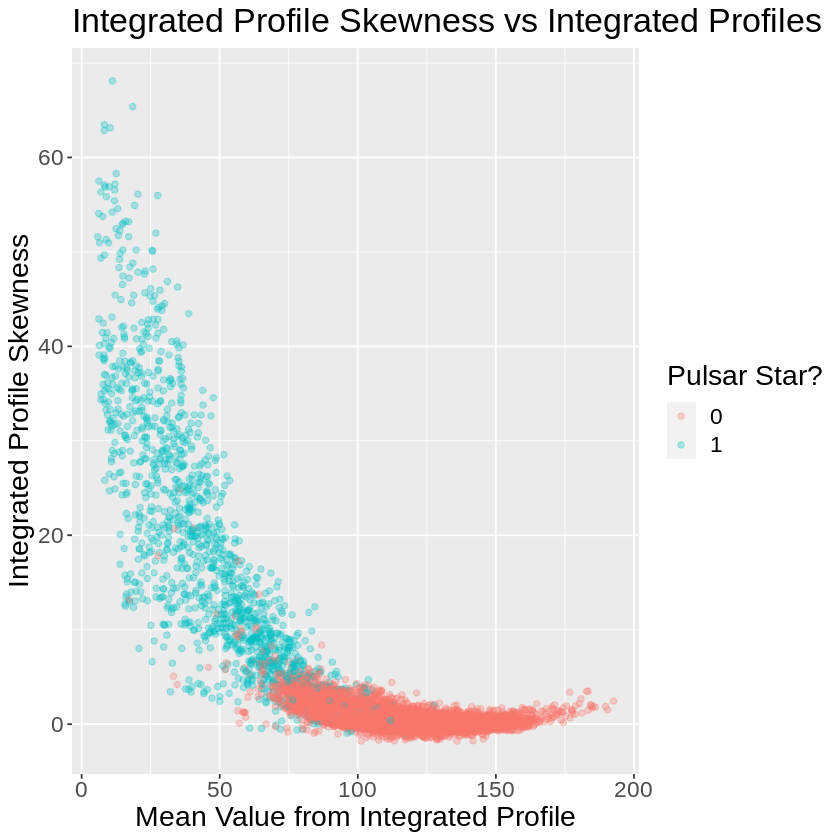

In [38]:
ggplot(star_data, aes(x = integrated_profile_mean, y = integrated_profile_skewness,
                         color = is_pulsar_star)) +
    geom_point(alpha=0.3) +
    labs(x = "Mean Value from Integrated Profile",
         y = "Integrated Profile Skewness",
         color = "Pulsar Star?") +
    ggtitle("Integrated Profile Skewness vs Integrated Profiles") +
    theme(text = element_text(size = 17))

In [35]:
star_data_standardized <- star_data |>
    mutate(integrated_profile_mean = scale(integrated_profile_mean, center = TRUE),
           integrated_profile_std_dev = scale (integrated_profile_std_dev, center = TRUE),
           integrated_profile_excess_kurtosis = scale(integrated_profile_excess_kurtosis, center = TRUE),
           integrated_profile_skewness = scale(integrated_profile_skewness, center = TRUE),
           dm_snr_curve_mean = scale(dm_snr_curve_mean, center = TRUE),
           dm_snr_curve_st_dev = scale (dm_snr_curve_st_dev, center = TRUE),
           dm_snr_curve_excess_kurtosis = scale(dm_snr_curve_excess_kurtosis, center = TRUE),
           dm_snr_curve_skewness = scale(dm_snr_curve_skewness, center = TRUE))
sample_n(star_data_standardized, 5)

integrated_profile_mean,integrated_profile_std_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-0.2948724,-0.3635940,0.005784302,-0.17598834,-0.2711471,0.11655255,-0.3930858,-0.5785094,0
0.2161558,0.7518916,-0.036765576,-0.32227842,-0.3903825,-0.66218114,1.3140053,1.1250485,0
-0.1489949,-1.0306661,-0.011254558,-0.09847769,-0.2895870,-0.06913493,-0.2011668,-0.4419394,0
-0.3609589,-0.5176486,-0.047780296,-0.16808102,0.1306449,1.45754009,-1.1321891,-0.9036063,0
-0.9325918,0.5412163,1.470072286,0.39872919,1.4505186,1.19711092,-1.5841041,-0.9664120,0


In [36]:
star_means_table_standardized <- star_data_standardized |>
    group_by(is_pulsar_star)|>
    summarize(across(integrated_profile_mean:dm_snr_curve_skewness, mean))
star_means_table_standardized

is_pulsar_star,integrated_profile_mean,integrated_profile_std_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.2137283,0.1154738,-0.2513226,-0.2252682,-0.1272743,-0.1560576,0.1240804,0.08226703
1,-2.1202003,-1.1455087,2.4931383,2.2346775,1.2625700,1.5481028,-1.2308865,-0.81609497
